In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
highLumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
lowLumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

higgs = pd.read_pickle('../Lab5/higgs_100000_pt_1000_1200.pkl')
qcd = pd.read_pickle('../Lab5/qcd_100000_pt_1000_1200.pkl')

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)


Event selection: 
* mass < 140
* t21 < 0.6
* ktdeltar > 0.1

In [70]:
def make_mass_cut(data):
    result = data[data['mass'] < 140]
    return result
def make_t21_cut(data):
    result = data[data['t21'] < 0.6]
    return result
def make_ktdeltar_cut(data):
    result = data[data['KtDeltaR'] > 0.1]
    return result
def make_all_cuts(data):
    data = make_mass_cut(data)
    data = make_t21_cut(data)
    data = make_ktdeltar_cut(data)
    return data

def approximate_sigma(cut_data, data):
    #calculate significance using approximation method
    sigma = len(cut_data)/np.sqrt(len(data)-len(cut_data))
    return sigma

def calculate_sigma(cut_data, data):
    prob = stats.poisson.sf(len(data), len(data)-len(cut_data))
    sigma = stats.norm.isf(prob)
    return sigma

In [87]:
selected_highLumi = make_all_cuts(highLumi)
selected_lowLumi = make_all_cuts(lowLumi)
selected_qcd = make_all_cuts(qcd)
selected_higgs = make_all_cuts(higgs)

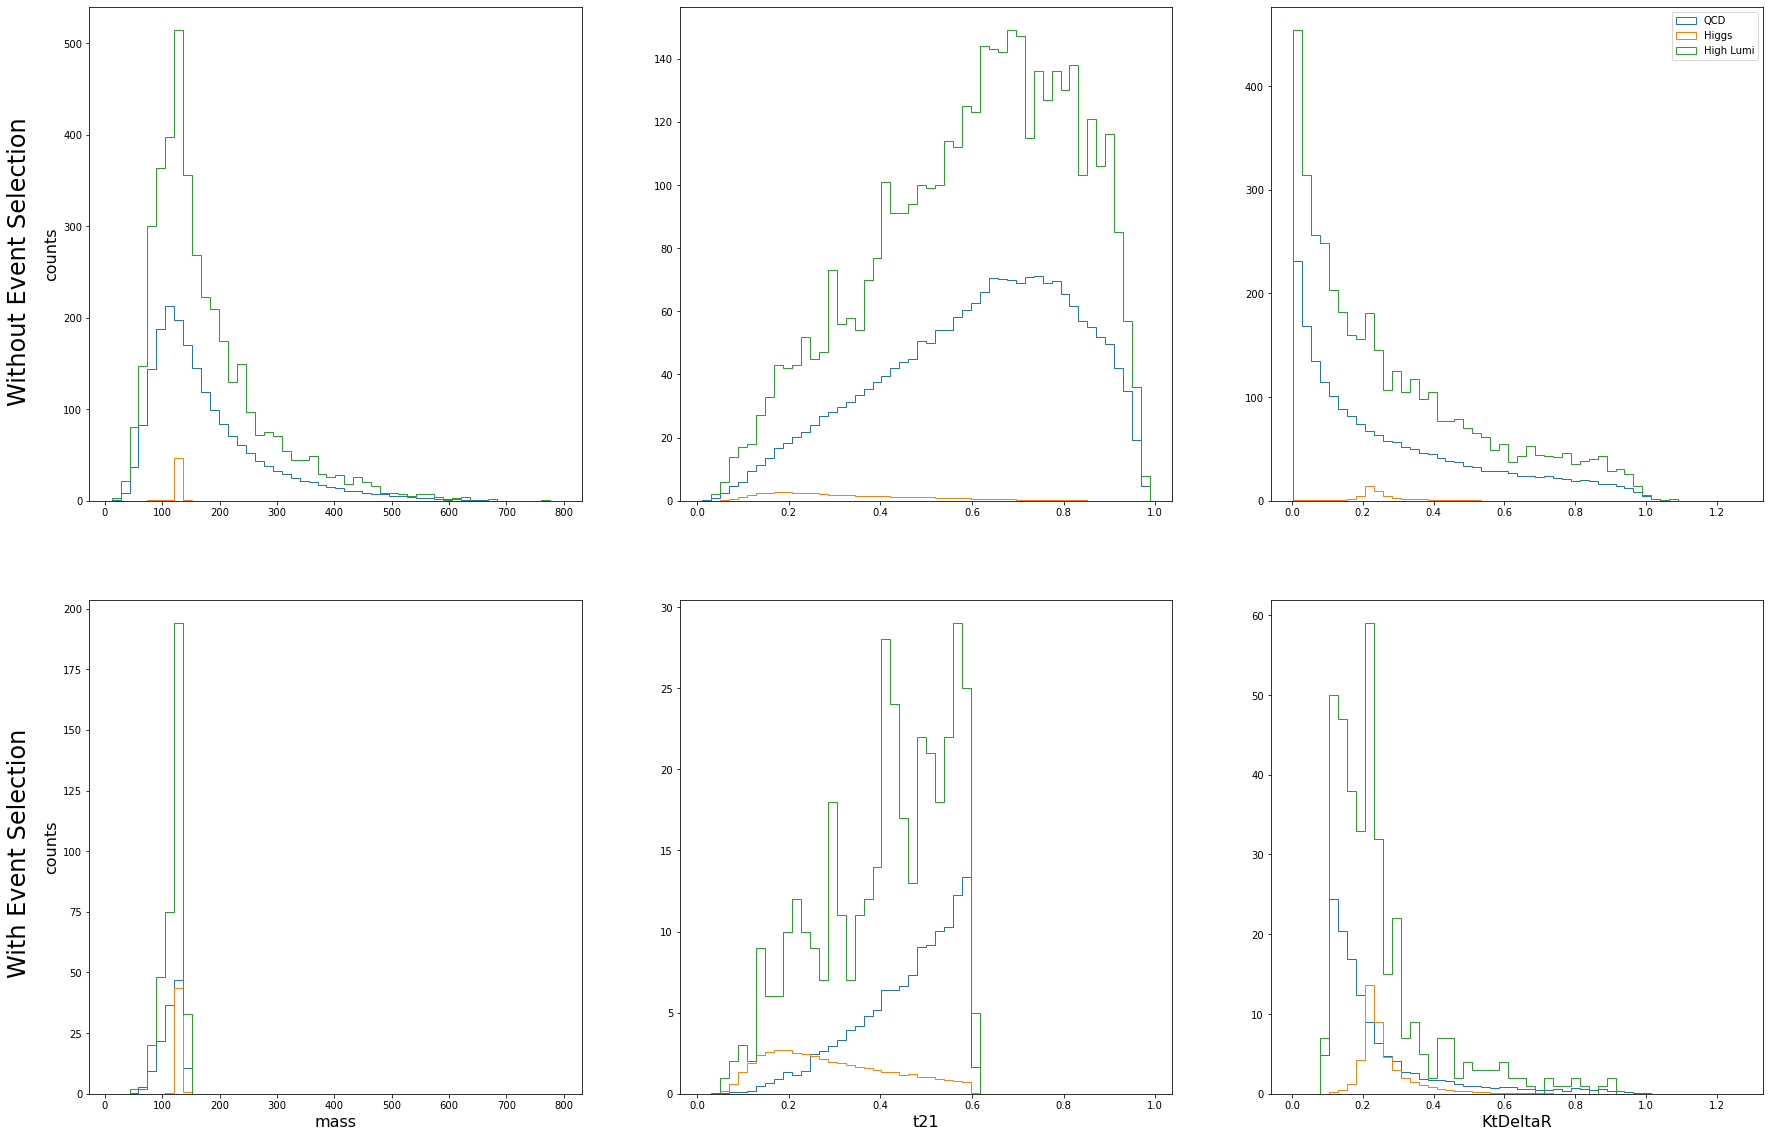

In [135]:
selection_keys = ['mass', 't21', 'KtDeltaR']

fig, ax = plt.subplots(2, 3, figsize = (30,20))
xlim = []
bins = []
for i in range(len(selection_keys)):
    hist1 = ax[0,i].hist(qcd[selection_keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD')
    hist2 = ax[0,i].hist(higgs[selection_keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs')
    hist3 = ax[0,i].hist(highLumi[selection_keys[i]], bins = hist1[1], histtype = 'step', label = 'High Lumi')
    
    bins.append(hist1[1])
    xlim.append(ax[0,i].get_xlim())    
for i in range(len(selection_keys)):
    hist1 = ax[1,i].hist(selected_qcd[selection_keys[i]], weights = np.ones(len(selected_qcd))*normalization_qcd, bins = bins[i], histtype = 'step', label = 'QCD')
    hist2 = ax[1,i].hist(selected_higgs[selection_keys[i]], weights = np.ones(len(selected_higgs))*normalization_higgs, bins = bins[i], histtype = 'step', label = 'Higgs')
    hist3 = ax[1,i].hist(selected_highLumi[selection_keys[i]], bins = bins[i], histtype = 'step', label = 'High Lumi')
    
    ax[1,i].set_xlim(xlim[i])
    ax[1,i].set_xlabel(selection_keys[i], fontsize = 16)
    
ax[0,0].set_ylabel('counts', fontsize = 16)    
ax[1,0].set_ylabel('counts', fontsize = 16)
ax[0,2].legend()
ax[0,0].text(-170 , 110, "Without Event Selection", rotation = 'vertical', fontsize = 24)
ax[1,0].text(-170 , 50, "With Event Selection", rotation = 'vertical', fontsize = 24)
plt.show()

In [127]:
sigma_highLumi = calculate_sigma(selected_highLumi, highLumi)
print(f'high lumi sigma: {sigma_highLumi: .2f}')

high lumi sigma:  6.07


In Lab 7, the expected sigma was 5.1

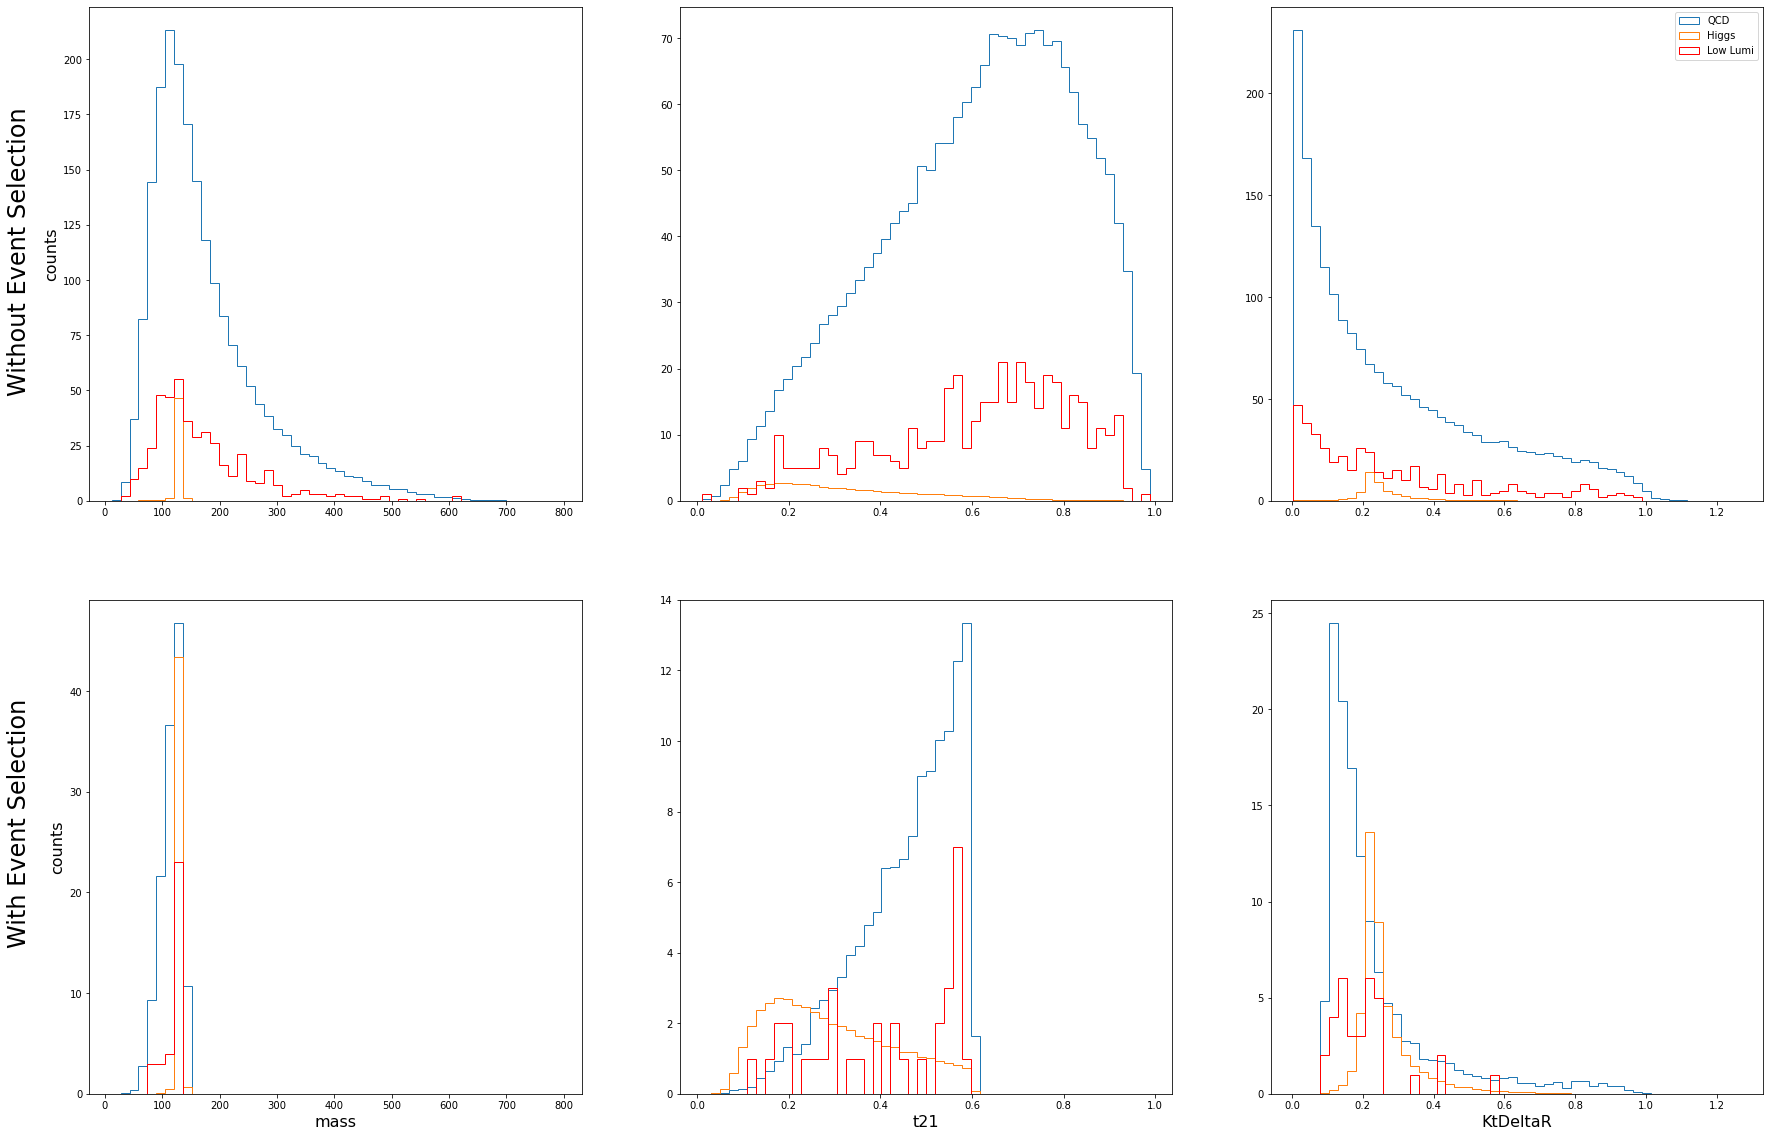

In [131]:
selection_keys = ['mass', 't21', 'KtDeltaR']

fig, ax = plt.subplots(2, 3, figsize = (30,20))
xlim = []
ylim = []
bins = []
for i in range(len(selection_keys)):
    hist1 = ax[0,i].hist(qcd[selection_keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD')
    bins.append(hist1[1])
    hist2 = ax[0,i].hist(higgs[selection_keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs')

    hist3 = ax[0,i].hist(lowLumi[selection_keys[i]], bins = hist1[1], histtype = 'step', label = 'Low Lumi', color = 'r')
    xlim.append(ax[0,i].get_xlim())
    ylim.append(ax[0,i].get_ylim())
    
for i in range(len(selection_keys)):
    hist1 = ax[1,i].hist(selected_qcd[selection_keys[i]], weights = np.ones(len(selected_qcd))*normalization_qcd, bins = bins[i], histtype = 'step', label = 'QCD')
    hist2 = ax[1,i].hist(selected_higgs[selection_keys[i]], weights = np.ones(len(selected_higgs))*normalization_higgs, bins = bins[i], histtype = 'step', label = 'Higgs')

    hist3 = ax[1,i].hist(selected_lowLumi[selection_keys[i]], bins = bins[i], histtype = 'step', label = 'Low Lumi', color = 'r')
    ax[1,i].set_xlim(xlim[i])
    ax[1,i].set_xlabel(selection_keys[i], fontsize = 16)
    
ax[0,0].set_ylabel('counts', fontsize = 16)    
ax[1,0].set_ylabel('counts', fontsize = 16)
ax[0,2].legend()
ax[0,0].text(-170 , 50, "Without Event Selection", rotation = 'vertical', fontsize = 24)
ax[1,0].text(-170 , 15, "With Event Selection", rotation = 'vertical', fontsize = 24)
plt.show()

In [289]:
sigma_lowLumi = calculate_sigma(selected_lowLumi, lowLumi)
print(f'low lumi sigma: {sigma_lowLumi: .2f}')

low lumi sigma:  1.64


In Lab 7, the expected sigma was 5.1. The low lumi data did not pass the 5$\sigma$ threshold for discovery. This means that the features I selected did not match the low lumi data well to remove background.

In [294]:
prob5sigma = 1/3.5e6
n_qcd = 2000
n_higgs = 50

expected_5sig_signal = stats.poisson.isf(prob5sigma, n_qcd) - n_qcd
observed_5sig_signal = stats.poisson.isf(prob5sigma, len(lowLumi)) - len(lowLumi)

print(expected_5sig_signal, observed_5sig_signal)

228.0 109.0


## Problem 3

I modeled the qcd background using a Poisson distribution with the number particles in selected qcd as the mu. The signal injected is uniform ranging from 0-400 because the 5$\sigma$ corresponds to 228 particles. The upper range of injected signal should be much greater than the 5$\sigma$ signal. The true signal is 40, which is the number of Higgs particles after event selection. 

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168]


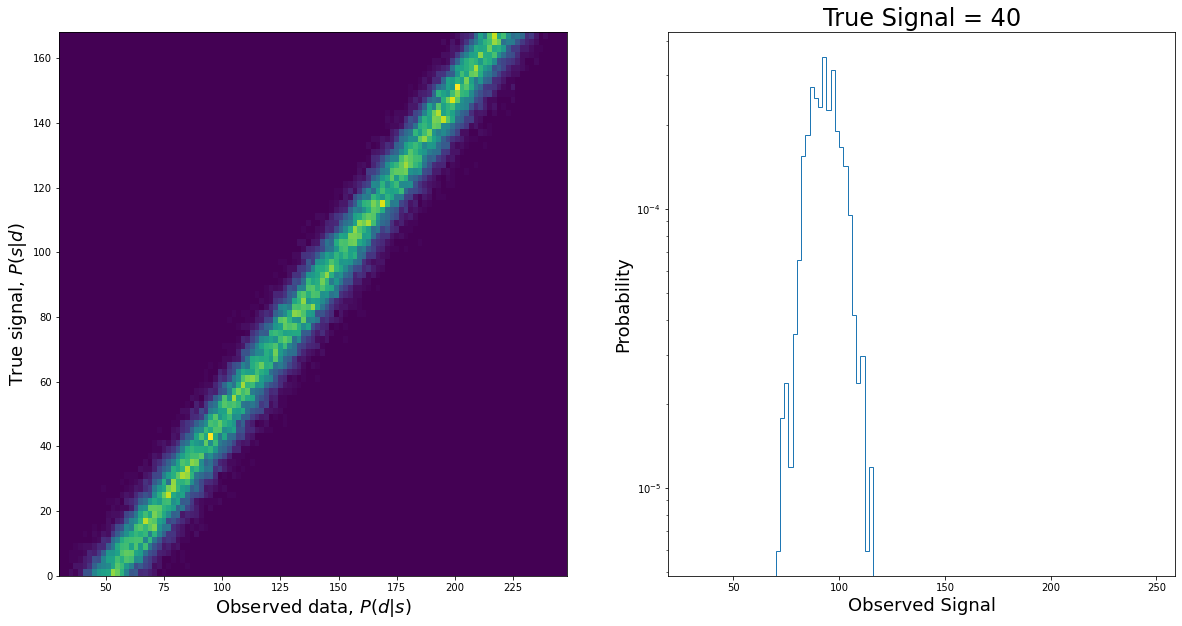

the 95% confidence level upper limit is: 92


In [287]:
mu = 52
size = 100000
bkgd = stats.poisson.rvs(mu, size = size)
signal = stats.uniform.rvs(loc = 0, scale = 400, size = size)

data = signal + bkgd

signaledges = np.arange(0, 170, 2)
dataedges = np.arange(30, 250, 2)

fig, ax = plt.subplots(1,2, figsize = (20,10))
p, xedges, yedges, img = ax[0].hist2d(data, signal, bins = [dataedges, signaledges], density = True)
print(yedges)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 18)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 18)

index = np.where(yedges == 40)[0]

ax[1].stairs(p.T[index][0], xedges)
ax[1].semilogy()

ax[1].set_xlabel('Observed Signal', fontsize = 18)
ax[1].set_ylabel('Probability', fontsize = 18)
ax[1].set_title('True Signal = 40', fontsize = 24)
plt.show()

mean_expected = xedges[np.argmax(p.T[index][0])]
print('the 95% confidence level upper limit is: ' + str(mean_expected))

Here I model the background as a Poisson distribution with mu of the number of particles after event selection in low lumi data. The injected signal is uniform ranging from 0-300 because the 5$\sigma$ threshold of low lumi data is 109. The true signal is 33 because that is the number of particles left after event selection of low lumi data.

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189 191 193 195 197 199]


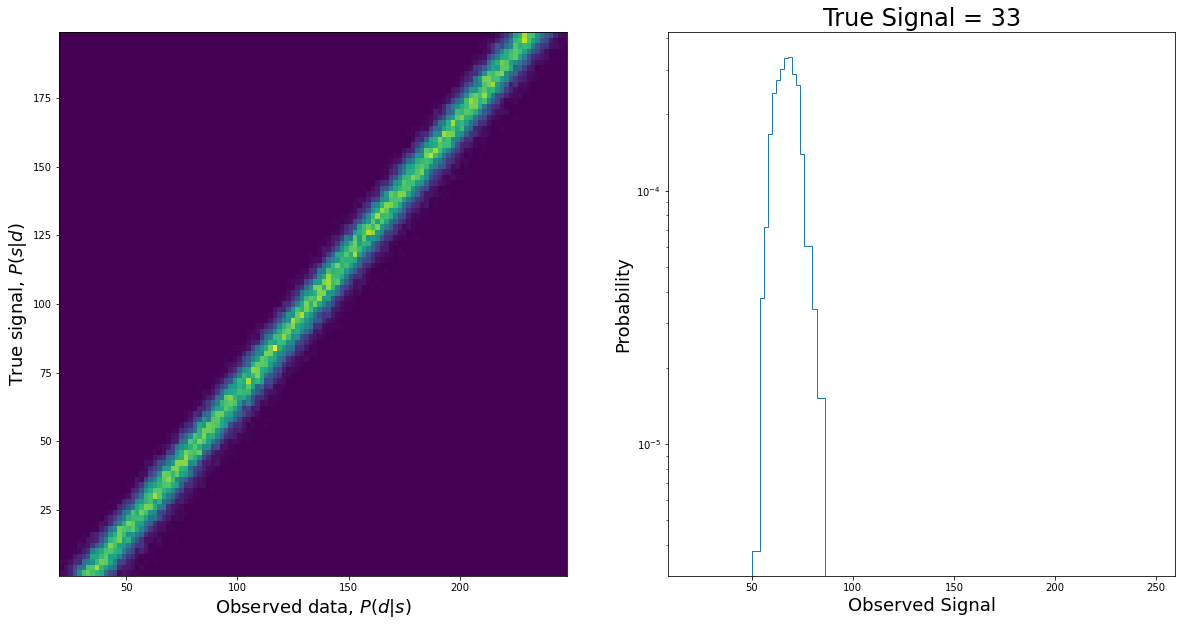

the 95% confidence level upper limit is: 68


In [288]:
mu = len(selected_lowLumi)
size = 100000
bkgd = stats.poisson.rvs(mu, size = size)
signal = stats.uniform.rvs(loc = 0, scale = 300, size = size)

data = signal + bkgd

signaledges = np.arange(1, 200, 2)
dataedges = np.arange(20, 250, 2)

fig, ax = plt.subplots(1,2, figsize = (20,10))
p, xedges, yedges, img = ax[0].hist2d(data, signal, bins = [dataedges, signaledges], density = True)
print(yedges)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 18)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 18)

index = np.where(yedges == 33)[0]

ax[1].stairs(p.T[index][0], xedges)
ax[1].semilogy()

ax[1].set_xlabel('Observed Signal', fontsize = 18)
ax[1].set_ylabel('Probability', fontsize = 18)
ax[1].set_title('True Signal = 33', fontsize = 24)
plt.show()

mean_observed = xedges[np.argmax(p.T[index][0])]
print('the 95% confidence level upper limit is: ' + str(mean_observed))

In [295]:
def calculate_1sigma(mean):
    signal = stats.poisson.interval(0.68, mean)
    return signal

signal_expected = calculate_1sigma(mean_expected)
signal_observed = calculate_1sigma(mean_observed)
print(signal_expected, signal_observed)

(82.0, 102.0) (60.0, 76.0)
